# Pymaceuticals Inc.
---

### Analysis

In this challenge, I merged two databases,one containing information about mice and the other containing studies conducted on them. The combination of these databases yielded 249 Mouse IDs. Only the Mouse ID "g989" had 13 duplicated entries in the Timepoint information. I cleaned the merged database by removing these duplicated entries for this mouse, resulting in 248 Mouse IDs without duplicates.

With the assistance of statistics, I calculated the mean, median, variance, standard deviation, and standard error of the mean (SEM) for the Tumor Volume for each Drug Regimen. I created a bar chart with Drug Regimen values and Mouse ID Timepoints. This chart showed that the Drug Regimens Capomulin and Ramicane had the highest values, while the Drug Regimen Proprivants had the lowest values.

Upon generating a Pie Plot of the mouse sexes, I found that 51% were male and 49% were female. Applying quartiles, outliers, and boxplots revealed that only for the Drug Regimen Infubinol, there was an outlier with a value of 36.32.

By creating a scatter plot and calculating the correlation and regression, I found that the correlation between the mouse's weight and the average tumor volume is 0.84. This indicates that as the mouse's weight increases, the tumor volume also tends to increase.
 

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data=pd.merge(study_results,mouse_metadata,how='left', on='Mouse ID')


# Display the data table for preview
merged_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [25]:
# Checking the number of mice.
len(merged_data['Mouse ID'].unique())

249

In [26]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_values = merged_data.loc[merged_data.duplicated(keep=False,subset=['Mouse ID','Timepoint'])]
mouse_group=duplicate_values['Mouse ID'].unique()
mouse_group


array(['g989'], dtype=object)

In [27]:
# Optional: Get all the data for the duplicate mouse ID. 
pd.DataFrame(merged_data.loc[merged_data['Mouse ID']==mouse_group[0]])


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [28]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
without_d=pd.DataFrame(merged_data.loc[merged_data['Mouse ID']!=mouse_group[0]])
without_d.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [29]:
# Checking the number of mice in the clean DataFrame.
len(without_d['Mouse ID'].unique())

248

## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

grp_tumorvol=merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)']
summary_stastistic = {
    'Mean Tumor Volume': grp_tumorvol.mean(),
    'Median Tumor Volume': grp_tumorvol.median(),
    'Tumor Volume Variance': grp_tumorvol.var(),
    'Tumor Volume Std. Dev.': grp_tumorvol.std(),
    'Tumor Volume Std. Err.': grp_tumorvol.sem()
}

pd.DataFrame(summary_stastistic).head()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [31]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
grp_tumorvol=merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)']
grp_tumorvol.agg(['mean','median','var', 'std', 'sem'])
# Using the aggregation method, produce the same summary statistics in a single line


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

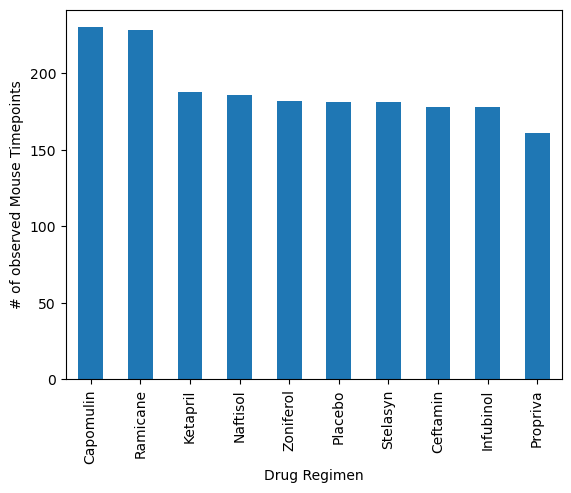

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
grp_timepoints=merged_data.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)
grp_timepoints.plot(kind='bar')
plt.ylabel('# of observed Mouse Timepoints')
plt.show()

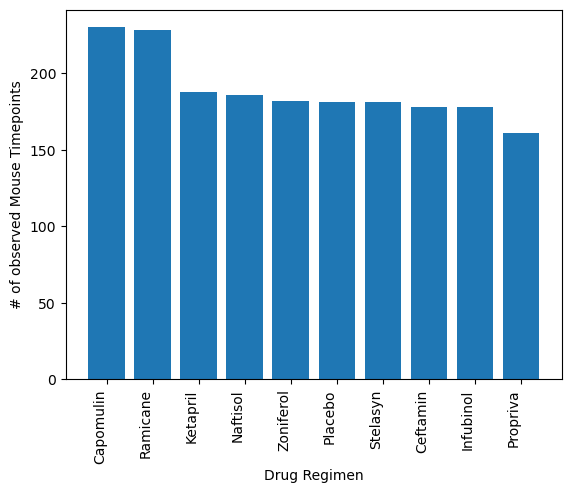

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
fig, ax = plt.subplots()
grp_timepoints_pyplot=merged_data.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)



ax.bar(pd.DataFrame(grp_timepoints_pyplot).index,pd.DataFrame(grp_timepoints_pyplot)['Timepoint'])
plt.xticks(rotation=90, ha='right')
plt.ylabel('# of observed Mouse Timepoints')
plt.xlabel('Drug Regimen')

plt.show()

<Axes: >

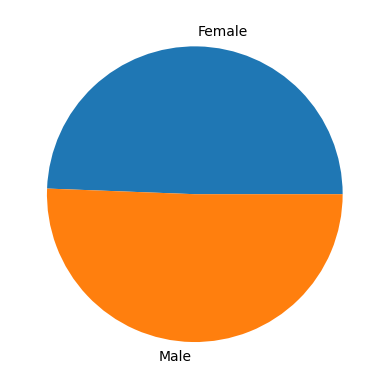

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Labels for the sections of our pie chart
labels = ["Female", "Male"]

grp_sex = merged_data.groupby('Sex').size()

sizes =  [grp_sex['Female'],grp_sex['Male']]
grp_sex.plot.pie()

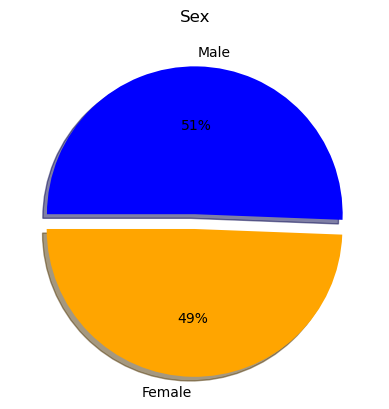

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]

grp_sex = merged_data.groupby('Sex').size()

sizes =  [grp_sex['Female'],grp_sex['Male']]

colors = ["orange", "blue"]

explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct="%1.0f%%", shadow=True, startangle=180)
plt.title("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
maxTimepoints=pd.DataFrame(without_d.groupby('Mouse ID')['Timepoint'].max())
maxTimepoints
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data_max=pd.merge( maxTimepoints,without_d, on=("Mouse ID","Timepoint"),how="left")
merged_data_max

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [37]:
# Put treatments into a list for for loop (and later for plot labels)
treatments =  ["Capomulin", "Ramicane", "Infubinol",  "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data=[]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    micerows_fil= merged_data_max.loc[merged_data_max['Drug Regimen']==treatment,"Tumor Volume (mm3)"]
    quartiles = micerows_fil.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier_vol = micerows_fil.loc[(micerows_fil < 
        lower_bound) | (micerows_fil > upper_bound)]
    print(f"{treatment}'s potential outliers: {outlier_vol}")
    tumor_vol_data.append(micerows_fil)



Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


/var/folders/16/j2xgyqsn4_zgk1l3nyvrh5gh0000gn/T/ipykernel_2350/4198640490.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(treatments)


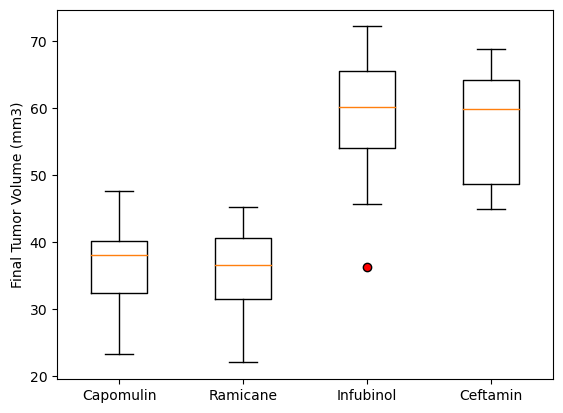

In [38]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xticklabels(treatments)
outlier = dict(markerfacecolor='red')
bp = ax1.boxplot(tumor_vol_data, flierprops=outlier)
plt.show()

## Line and Scatter Plots

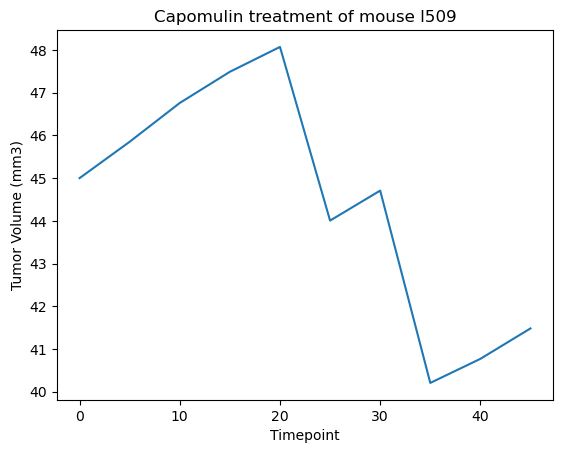

In [39]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
treatment_capo = without_d[without_d['Drug Regimen'] == 'Capomulin']
#treatment_capo
selected_mouse=treatment_capo["Mouse ID"].unique()[6]
treatment_capo["Mouse ID"].unique()
one_mouse= treatment_capo[treatment_capo['Mouse ID'] == selected_mouse]
one_mouse
plt.plot(one_mouse['Timepoint'], one_mouse['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Capomulin treatment of mouse {selected_mouse}')
plt.show()

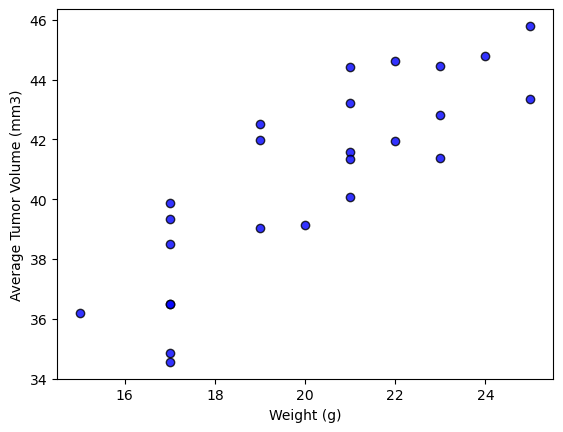

In [40]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_group=treatment_capo.groupby('Mouse ID')
average_tumor_vol=mouse_group["Tumor Volume (mm3)"].mean()
average_tumor_vol
weight_mouse=mouse_group["Weight (g)"].mean()
weight_mouse
plt.scatter(weight_mouse, average_tumor_vol, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.80)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.841936342469472


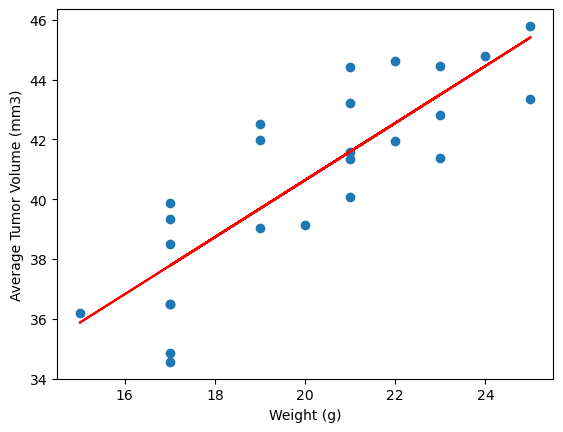

Slope: 0.9544396890241047
Intercept: 21.55216053268501
Rvalue: 0.841936342469472
Stderr: 0.12754359033201326


In [41]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_mouse, average_tumor_vol)
regress_values = weight_mouse * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight_mouse, average_tumor_vol)
plt.plot(weight_mouse, regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between mouse weight and the average tumor volume is {rvalue}")
plt.show()
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"Rvalue: {rvalue}")
print(f"Stderr: {stderr}")